<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdution to neural network classifiation with tensorflow

In this notebook we're going to learn how to write neural network classifiation using tensorflow.

a classifiation proble is when you try to lassify soething as one thing or another

few types of classifiation probles
* binary classifiation
* multi class classifiation
* multi label classifiation

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now.. let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


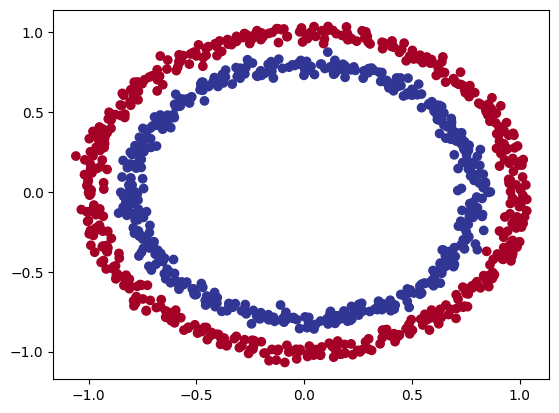

In [ ]:
# Visualie with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# HOw many samples we have.
len(X), len(y)

(1000, 1000)

## steps in modelling



In [ ]:
# Build the model.

# set random set
import tensorflow as tf
tf.random.set_seed(42)

# Build the classification sequential model.
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(12, activation="relu", input_shape=(2,)),
    Dense(1, activation="sigmoid")
])

# compile the model.
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)


# fit the model.
model_history = model.fit(
    X, y,
    validation_data = (X, y),
    epochs = 100
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5296 - loss: 0.6931 - val_accuracy: 0.5040 - val_loss: 0.6957
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5309 - loss: 0.6889 - val_accuracy: 0.5060 - val_loss: 0.6920
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5319 - loss: 0.6865 - val_accuracy: 0.5090 - val_loss: 0.6892
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5341 - loss: 0.6847 - val_accuracy: 0.5110 - val_loss: 0.6870
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5342 - loss: 0.6834 - val_accuracy: 0.5100 - val_loss: 0.6852
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5296 - loss: 0.6823 - val_accuracy: 0.5140 - val_loss: 0.6836
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5332 - loss: 0.6814 - val_accuracy: 0.5180 - val_loss: 0.6821
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5359 - loss: 0.6804 - val_accuracy: 0.5280 - 

In [ ]:
# evaluate the model.
model.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.4605 


[0.458230197429657, 0.984000027179718]

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

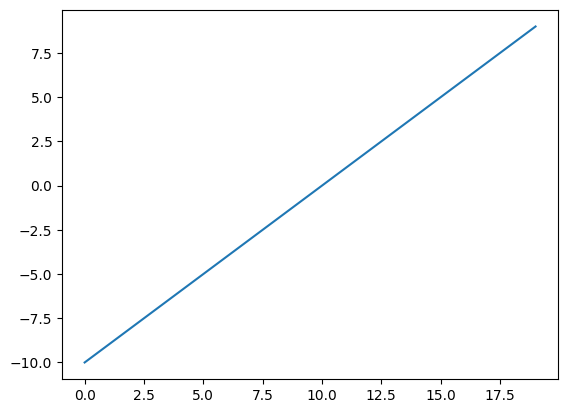

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Lets start by replicating sigmoid - 1 / (1 + e^(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor.
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

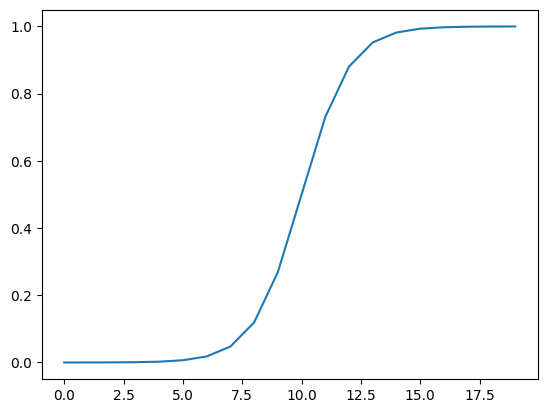

In [ ]:
# Plot our toy tensor transformed by sigmoid.
plt.plot(sigmoid(A))

In [ ]:
# Let's replicate it same for relu f(x) = max(0, x)

def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu functions..
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

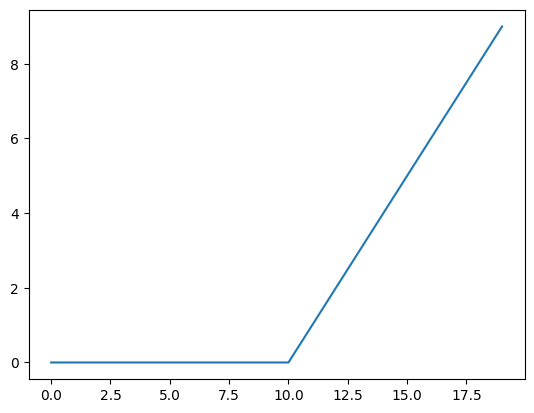

In [ ]:
# Plot ReLu-modified tensor.
plt.plot(relu(A))

## Evaluating an improving our classification model

we've been training and testing on the same dataset...

However, in ML its a sin.

So Let's create training and test set.

In [ ]:
# Check how many sample we have.
len(X)

1000

In [ ]:
# import train test split to split our data.
from sklearn.model_selection import train_test_split

# create the train - test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Training on training data to be tested on test data.

# set the random seed.
tf.random.set_seed(42)

# Create the model.
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model.
model_8.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"] # Add accuracy here
)


# Fit the model.
model_8_summary = model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4938 - loss: 0.6946
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4866 - loss: 0.6905 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4984 - loss: 0.6881 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 0.6863 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5263 - loss: 0.6847 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5269 - loss: 0.6831 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5215 - loss: 0.6814 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5271 - loss: 0.6796 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5298 - loss: 0.6777 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5360 - loss: 0.6758 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5506 - loss: 0.6738 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [ ]:
# Evaluate the model on test dataset.
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9892 - loss: 0.0830  


[0.08606117218732834, 0.9950000047683716]

NameError: name 'plot_decision_boundary' is not defined

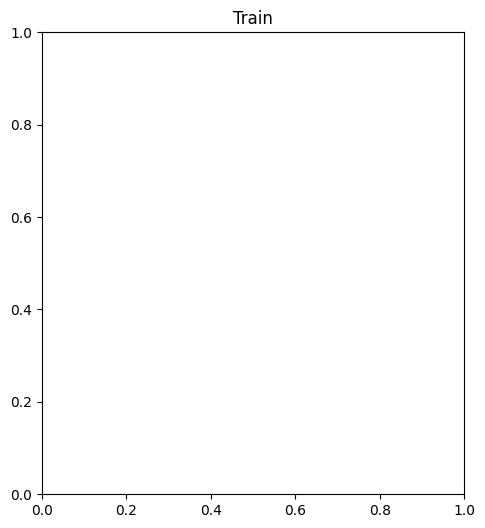

In [ ]:
# Plot the decision boundaries for the training and test sets.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

In [ ]:
import numpy as np

# Helper function to plot a decision boundary
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function is adapted from:
  https://www.tensorflow.org/tutorials/keras/classification#plot_a_decision_boundary
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make predictions on these)
  x_linspace = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions across the grid
  y_pred = model.predict(x_linspace)

  # Check for multi-class
  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Now that the `plot_decision_boundary` function is defined, let's try plotting the decision boundaries again.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


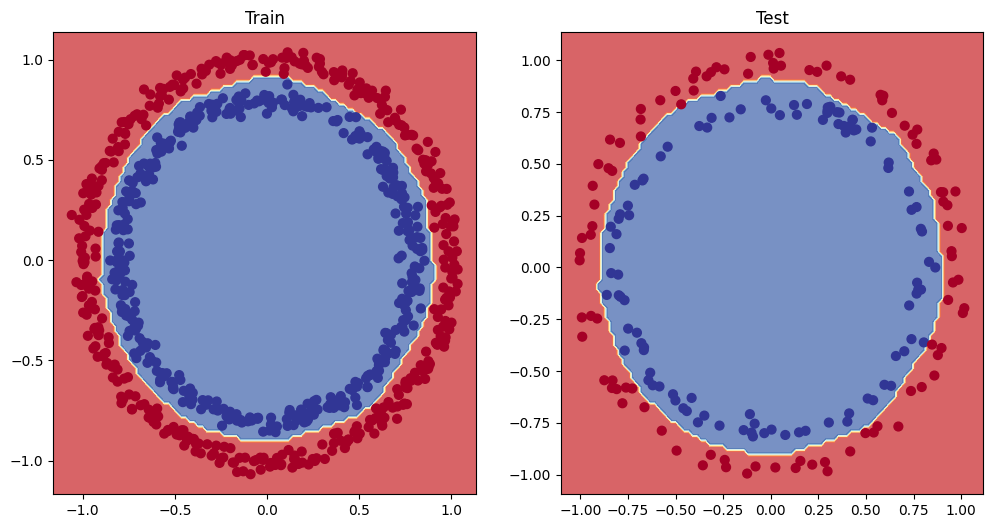

In [ ]:
# Plot the decision boundaries for the training and test sets.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

<Axes: >

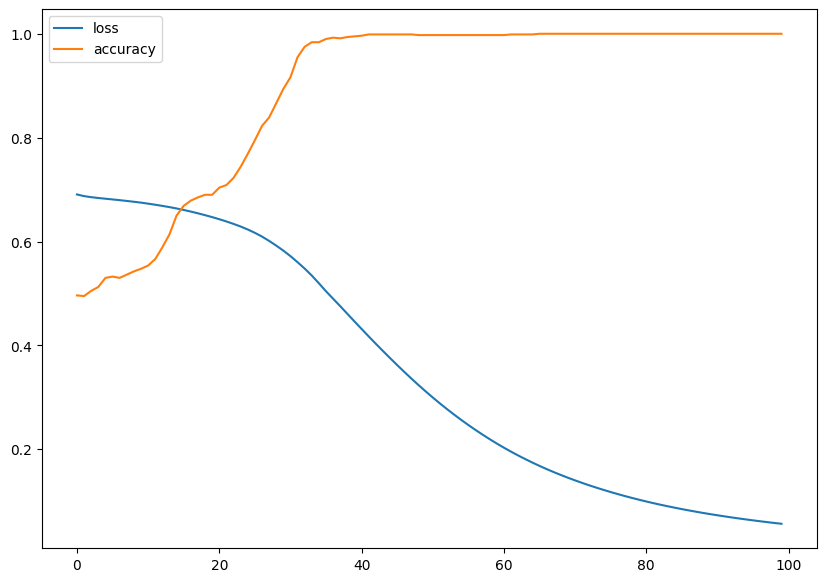

In [ ]:
# Plot the loss curves.
pd.DataFrame(model_8_summary.history).plot(
    y = ["loss", "accuracy"],
    figsize = (10, 7)
)

<Axes: >

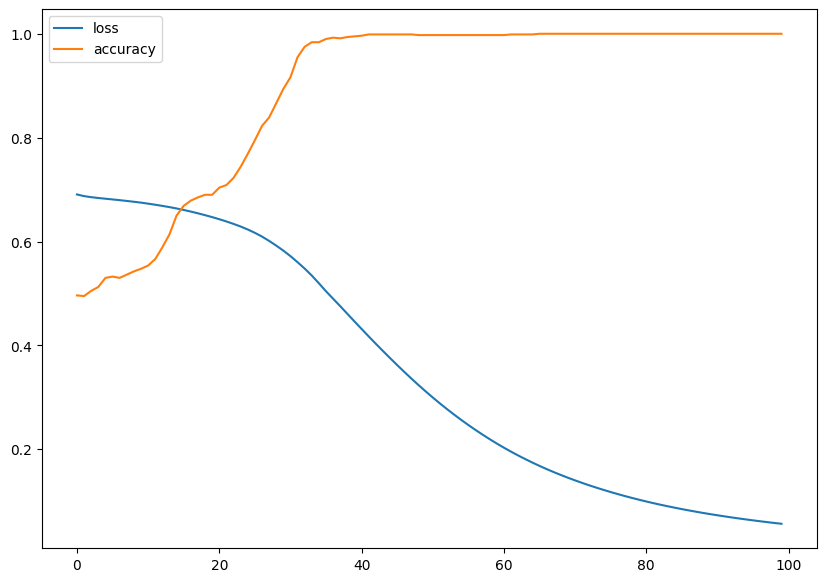

In [ ]:
pd.DataFrame(model_8_summary.history).plot(
    y = ["loss", "accuracy"],
    figsize = (10, 7)
)

**Note**: For many problems, since the lost is going down hence the model is improving

# Finding the best learning rate.

To find the ideal learning rate (the learning rate where the loss decresses the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of  a callback as an extra piece of functionality, you can add while its training.
* Another model (we could use the same one as above, but we're practicing building models)
* Modified lost curve plot

In [ ]:
# Set random seed.
tf.random.set_seed(42)

# Create a model(same as model 8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model.
model_9.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

# Fit the model.
model_9_history = model_9.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5291 - loss: 0.6883 - val_accuracy: 0.5350 - val_loss: 0.6829
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5647 - loss: 0.6725 - val_accuracy: 0.5850 - val_loss: 0.6653
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6235 - loss: 0.6519 - val_accuracy: 0.8150 - val_loss: 0.6364
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8050 - loss: 0.6166 - val_accuracy: 0.7600 - val_loss: 0.5980
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8107 - loss: 0.5731 - val_accuracy: 0.8200 - val_loss: 0.5523
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9023 - loss: 0.5151 - val_accuracy: 0.9200 - val_loss: 0.4895
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9744 - loss: 0.4437 - val_accuracy: 0.9750 - val_loss: 0.4206
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9782 - loss: 0.3679 - val_accuracy: 0.9800 - 

## Finding the best learning rate.

To find the ideal learning rate (the learning rate where the lost decreases the most during training). We're going to use the following steps.

* A Learning rate **callback** - its a peace of functionality we can add to our model while its training.
* Another model
* Modified loss curves plot

In [ ]:
# Set random set.
tf.random.set_seed(42)

# Create a model (same as model 8)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model.
model_10.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

# Create a learning rate callback.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20)
)


# Fit the model.
model_10_history = model_10.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    callbacks = [lr_scheduler]
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5064 - loss: 0.6925 - val_accuracy: 0.5100 - val_loss: 0.6925 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5017 - loss: 0.6923 - val_accuracy: 0.5050 - val_loss: 0.6924 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.6922 - val_accuracy: 0.5050 - val_loss: 0.6923 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4953 - loss: 0.6920 - val_accuracy: 0.5150 - val_loss: 0.6922 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4954 - loss: 0.6918 - val_accuracy: 0.5200 - val_loss: 0.6921 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5046 - loss: 0.6916 - val_accuracy: 0.5150 - val_loss: 0.6920 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.

<Axes: >

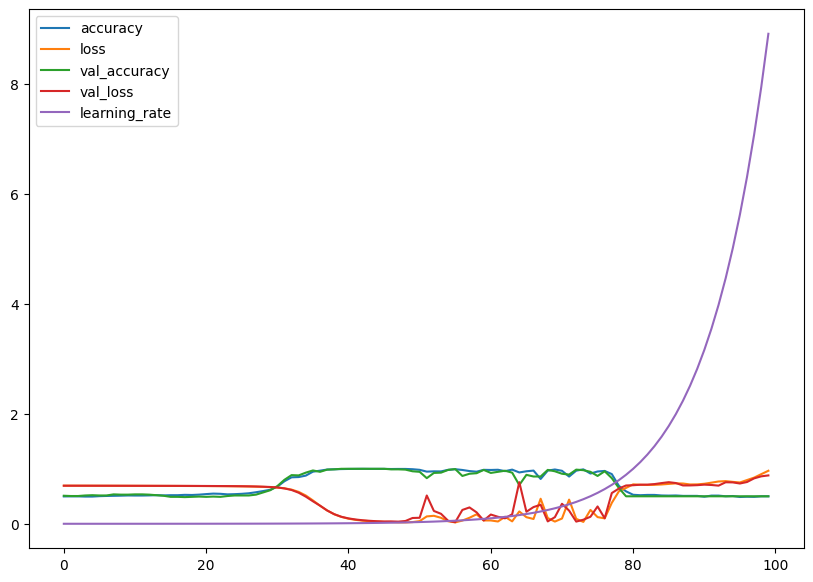

In [ ]:
# check out the history.
pd.DataFrame(model_10_history.history).plot(
    figsize = (10, 7)
)

Text(0.5, 1.0, 'Finding the best learning rate')

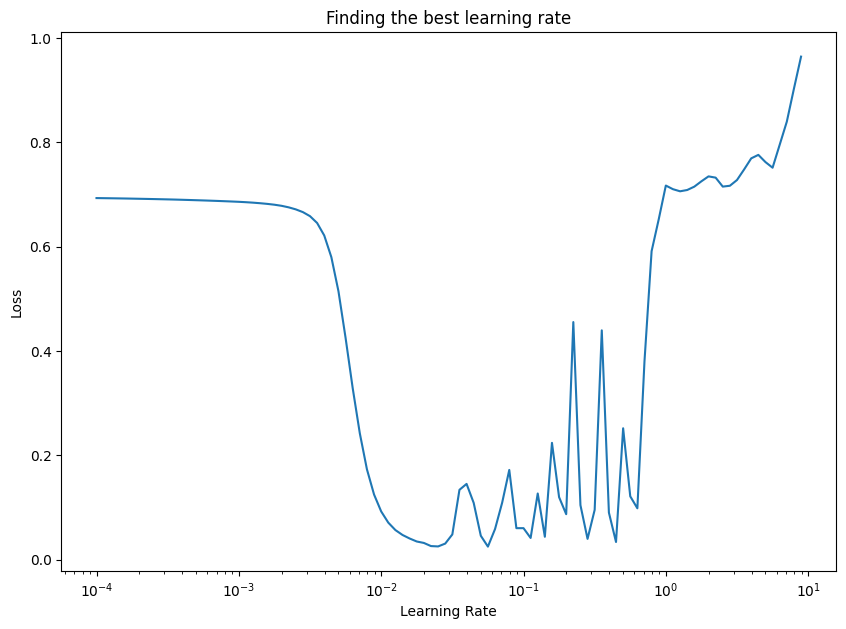

In [ ]:
# Plot the learning rate versus the loss.

lrs = 1e-4 * (10 ** (np.arange(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_10_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the best learning rate")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


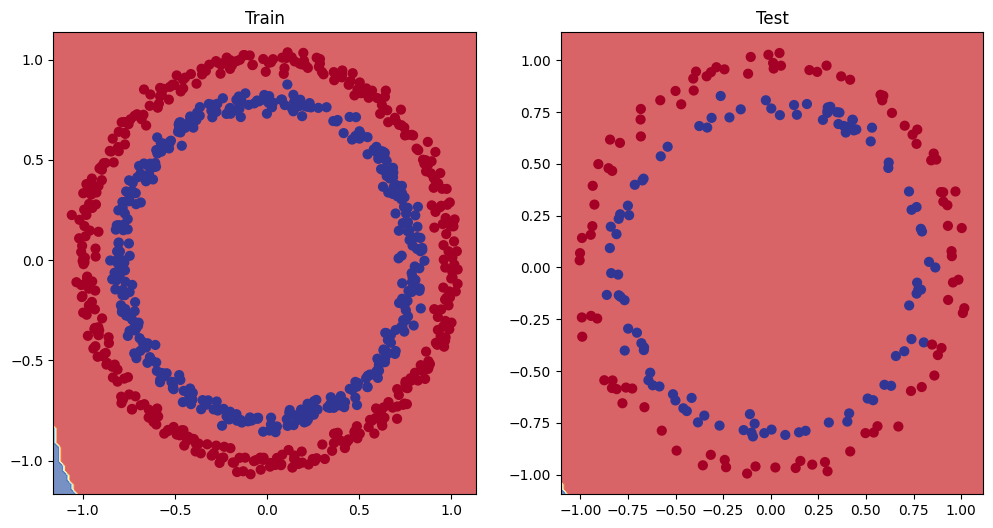

In [ ]:
# Plot the decisoin boundary for the training and test sets.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

## How about a confusion matrix ?

In [ ]:
# Create a confusion matrix.
from sklearn.metrics import confusion_matrix

# Make predictions.
y_preds = model_10.predict(X_test)

# Create a mconfusion matrix
confusion_matrix(y_test, y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433]], dtype=float32)

In [ ]:
# display last 10 values of y_preds.
y_preds[-10:]

array([[0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433],
       [0.22102433]], dtype=float32)

# we have to convert our prediction array into 0 and 1.

the standard output from sigmoid activation function is a prediction probability form.

In [ ]:
# convert our prediction proba to binary format and ivew the first 10.
tf.round(model_10.predict(X_test[:10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
y_preds = tf.round(model_10.predict(X_test))
y_preds[-10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

<Axes: >

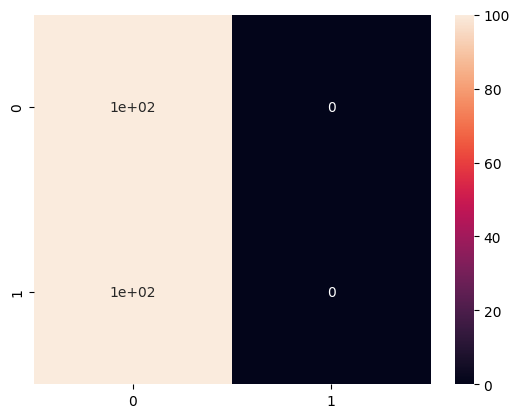

In [ ]:
# plot our confusion matrix.
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
#

# Working with an larget example(Multiclass classification)

When you have more than 2 classes as an option, it's known as **Multi-class classification**.


To practice multi-class classifcation, we're going to build a neural network to classfical images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist



In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# show the first training examsples.

print(f"Training sample:\n {train_images[0]}")
print(f"Training label:\n{train_labels[0]}")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
# Check the shape of a single example.
train_images[0].shape, train_labels[0].shape

((28, 28), ())

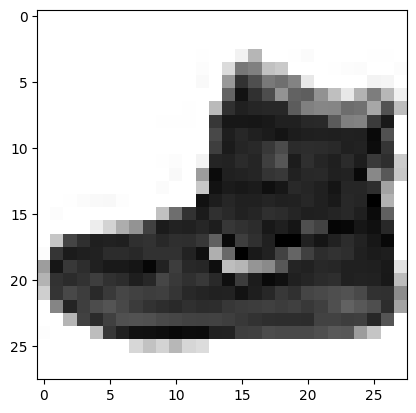

In [5]:
# Plot a single sample.
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap=plt.cm.binary)

In [6]:
# check sample label.
# plt.imshow(train_labels[7])

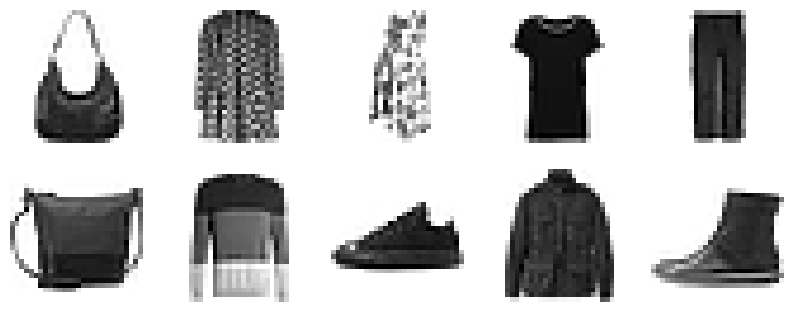

In [7]:
# Plot multiply random images of fashion MNIST
import random

plt.figure(figsize=(10, 10))
for i in range(10):
  ax = plt.subplot(5, 5, i +1)
  rand_index = random.choice(range(len(train_images)))
  plt.imshow(train_images[rand_index], cmap=plt.cm.binary)
  plt.axis("off")

## Building a multi-class classification model.

In [8]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
# Build the model.

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # we have to flatten our data.
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model.
model_11.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer = "adam",
    metrics = ["accuracy"]
)

# early stopping callback.
from tensorflow import keras
callback = keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)

# fit the model.
model_11.fit(
    train_images, train_labels,
    validation_data = (test_images, test_labels),
    epochs = 10,
    callbacks = [callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1016 - loss: 2.3364 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0957 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0995 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0990 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026


In [10]:
# model summary.
model_11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [11]:
# check the min and max values of training data.
train_images.min(), train_images.max()

(np.uint8(0), np.uint8(255))

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors between 0 & 1

In [12]:
# We can get our training adn testing data between 0  and 1 by dividing each sample by max(255)

train_images_scale = train_images / 255.0
test_images_scale = test_images / 255.0

train_images_scale.min(), train_images_scale.max()

(np.float64(0.0), np.float64(1.0))

In [13]:
# create the model.
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # we have to flatten our data.
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile th emodel and fit.
model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer = "adam",
    metrics = ["accuracy"]
)

# fit the model.
model_12_history = model_12.fit(
    train_images_scale, train_labels,
    validation_data = (test_images_scale, test_labels),
    epochs = 10,
    callbacks = [callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4762 - loss: 1.4028 - val_accuracy: 0.7060 - val_loss: 0.7599
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7089 - loss: 0.7295 - val_accuracy: 0.7387 - val_loss: 0.6739
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7550 - loss: 0.6419 - val_accuracy: 0.7524 - val_loss: 0.6371
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7708 - loss: 0.6003 - val_accuracy: 0.7789 - val_loss: 0.6032
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7895 - loss: 0.5760 - val_accuracy: 0.7820 - val_loss: 0.5975
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8026 - loss: 0.5506 - val_accuracy: 0.7898 - val_loss: 0.5947
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8082 - loss: 0.5406 - val_accuracy: 0.8036 - val_loss: 0.5617
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8132 - loss: 0.5292 - 

In [14]:
# EVALUTE our model.
model_12.evaluate(test_images_scale, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8151 - loss: 0.5290


[0.5381473898887634, 0.8118000030517578]

**Note** Neuaral network turns to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1)

<Axes: >

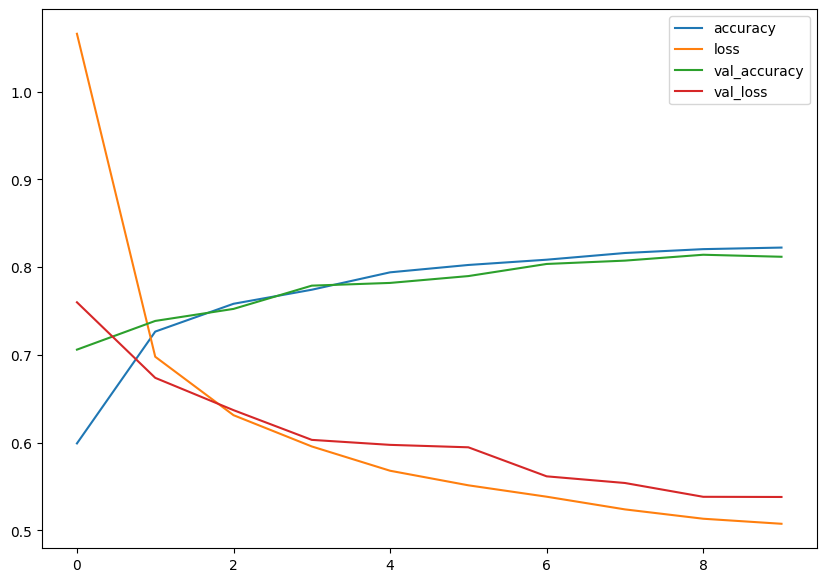

In [15]:
import pandas as pd

# plot loss curves with normlalized data.
pd.DataFrame(model_12_history.history).plot(
    figsize = (10, 7))

## finding the ideal learning rate.

In [16]:
# set the random seed.
tf.random.set_seed(42)

# Create the model.
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


# compile.
model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]

)

# Create the learning rate callback.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20)
)

# fit the model.
model_13_history = model_13.fit(
    train_images_scale, train_labels,
    validation_data = (test_images_scale, test_labels),
    epochs = 10,
    callbacks = [callback, lr_scheduler]

)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1750 - loss: 2.1640 - val_accuracy: 0.3768 - val_loss: 1.8217 - learning_rate: 1.0000e-04
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4250 - loss: 1.7231 - val_accuracy: 0.5199 - val_loss: 1.4791 - learning_rate: 1.1220e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5316 - loss: 1.4075 - val_accuracy: 0.5392 - val_loss: 1.2786 - learning_rate: 1.2589e-04
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5526 - loss: 1.2315 - val_accuracy: 0.5875 - val_loss: 1.1475 - learning_rate: 1.4125e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6189 - loss: 1.1013 - val_accuracy: 0.6538 - val_loss: 1.0325 - learning_rate: 1.5849e-04
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6670 - loss: 0.9904 - val_accuracy: 0.6626 - val_loss: 0.9385 - learning_rate: 1.7783e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/st

In [17]:
# Plot the learning rate decay curve.

import numpy as np

lrs = 1e-3 * (10 ** (np.arange(len(model_13_history.history["loss"])) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_13_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the best learning rate")

NameError: name 'np' is not defined

### To evaluate our muliticlass classfication model.

* we can utitlize Confusion metrix.
* Assess some of its prediction accuracy.
* imporve the results by trianing for lonnger

In [26]:
# Create a confusion matrix.
from sklearn.metrics import confusion_matrix

# make prdictions.
y_preds = model_13.predict(test_images_scale)
y_preds[:5]


y_preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.0760433e-04, 1.2223515e-05, 4.8490943e-05, ..., 3.7505543e-01,
        4.0778387e-02, 3.6934999e-01],
       [4.1131318e-02, 6.9345215e-06, 6.5168136e-01, ..., 5.7038335e-23,
        1.1766857e-04, 1.2215792e-18],
       [5.4639320e-09, 9.9925995e-01, 1.4206492e-04, ..., 1.3216269e-19,
        4.6816172e-06, 2.1624247e-08],
       ...,
       [2.4666321e-01, 1.4643465e-08, 3.7150455e-04, ..., 3.1419408e-08,
        6.7714816e-01, 1.0934328e-07],
       [6.7774475e-09, 9.9725574e-01, 3.5799556e-05, ..., 6.1129321e-18,
        1.8094555e-05, 1.5944810e-06],
       [1.3145005e-03, 2.4775958e-05, 2.8671997e-04, ..., 3.7250024e-01,
        1.9874457e-02, 3.9882414e-02]], dtype=float32)

In [27]:
y_preds[0]

array([2.0760433e-04, 1.2223515e-05, 4.8490943e-05, 9.9679350e-04,
       1.1183730e-05, 2.1301001e-01, 5.2975270e-04, 3.7505543e-01,
       4.0778387e-02, 3.6934999e-01], dtype=float32)

In [28]:
tf.argmax(y_preds[0])

<tf.Tensor: shape=(), dtype=int64, numpy=7>

In [30]:
# Convert all of the predictions prob. into integers.
y_preds = y_preds.argmax(axis=1)

y_preds

array([7, 2, 1, ..., 8, 1, 5])

In [31]:
# Create a confusion matrix to evaluate our model.

confusion_matrix(test_labels, y_preds)

array([[757,   0,  25,  49,  33,   8, 105,   0,  22,   1],
       [  3, 935,  16,  36,   5,   0,   3,   0,   2,   0],
       [ 45,  13, 638,  17, 132,   0, 150,   0,   5,   0],
       [ 40,  20,   5, 723,  61,   2, 104,   0,  45,   0],
       [ 16,   3, 197,  82, 556,   0, 144,   0,   2,   0],
       [  0,   0,   0,   1,   0, 811,   0, 140,  13,  35],
       [230,   1, 130,  47, 212,   3, 354,   0,  23,   0],
       [  0,   0,   0,   0,   0,  68,   0, 861,   0,  71],
       [ 38,   1,   0,  38,   5,  42,  20,   2, 843,  11],
       [  0,   1,   0,   0,   0,  22,   0,  61,   5, 911]])

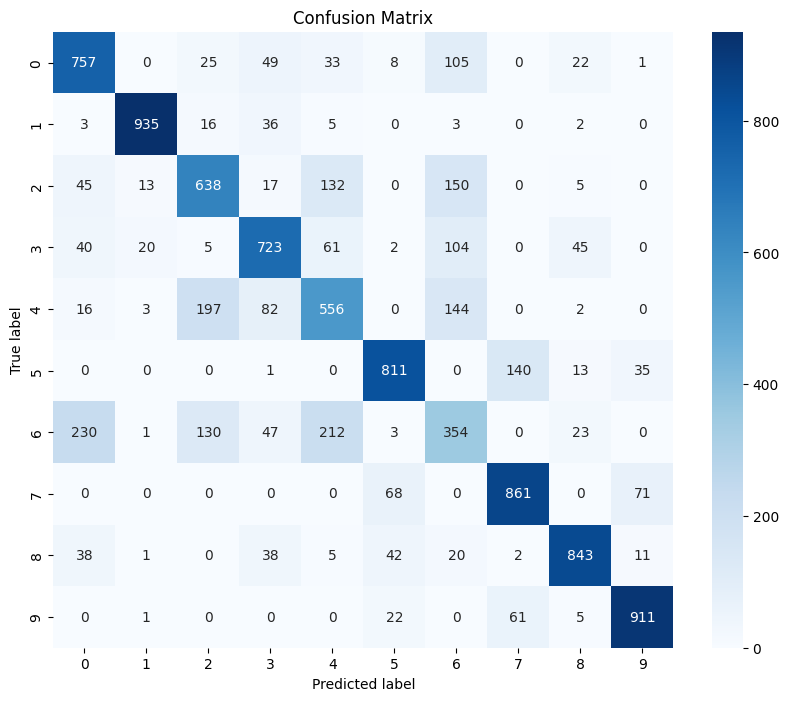

In [32]:
# make a pretty confusion matrix.

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_preds are already defined from previous cells

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(test_labels, y_preds), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

**Note** Often when working with images and other form of data. it's a good idea to visaluze as much as possible to develope a good understanding of the data and I/O of our model

In [40]:
# Function for plot a random image, Make a prediction on the image and label the plot with the truth label and predicted label.

def plot_random_image(model, images, true_labels, classes):
  """
    Picks a rnadom image, plots the label with it and truth label.
  """
  i = random.randint(0, len(images))

  # Create predictions and targets.
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_labels = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image.
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change color title if the prediction is right or wrong.
  if pred_labels == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information.
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_labels,
                                                   pred_probs.max() * 100,
                                                   true_label),
             color=color)
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


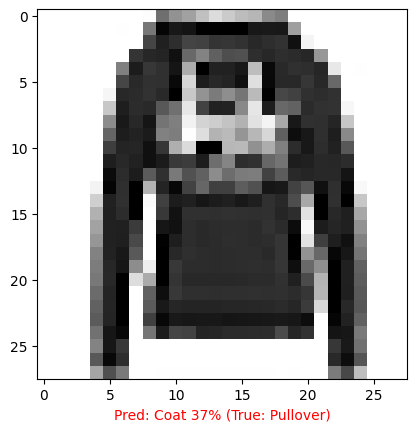

In [56]:
# Define class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plot_random_image(model_13, test_images_scale, test_labels, classes=class_names)